In [18]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import sympy as smp

$f(x) = \sin \frac{1}{1+\left(\arctan e^{-x^2}\right)^2} + x - \alpha$

In [21]:
x_symb, a_symb = smp.symbols('x alpha', real=True)

In [23]:
f_symb = smp.sin(1/(1+(smp.atan(smp.exp(-x_symb**2)))**2))+x_symb-a_symb

In [27]:
df_symb = f_symb.diff(x_symb)
df_symb

4*x*exp(-x**2)*cos(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2))/((1 + exp(-2*x**2))*(atan(exp(-x**2))**2 + 1)**2) + 1

In [36]:
d2f_symb = f_symb.diff(x_symb,2)
d2f_symb

4*(-2*x**2*cos(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2)) - 2*x**2*exp(-x**2)*cos(1/(atan(exp(-x**2))**2 + 1))/(1 + exp(-2*x**2)) + 4*x**2*exp(-2*x**2)*cos(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2))/(1 + exp(-2*x**2)) + 8*x**2*exp(-x**2)*cos(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2))**2/((1 + exp(-2*x**2))*(atan(exp(-x**2))**2 + 1)) - 4*x**2*exp(-x**2)*sin(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2))**2/((1 + exp(-2*x**2))*(atan(exp(-x**2))**2 + 1)**2) + cos(1/(atan(exp(-x**2))**2 + 1))*atan(exp(-x**2)))*exp(-x**2)/((1 + exp(-2*x**2))*(atan(exp(-x**2))**2 + 1)**2)

In [37]:
df = np.vectorize(smp.lambdify((x_symb, a_symb), df_symb))
d2f = np.vectorize(smp.lambdify((x_symb, a_symb), d2f_symb))

In [5]:
f = lambda x, a: np.sin(1/(1+(np.arctan(np.exp(-x**2)))**2)) + x - a

In [58]:
xl, xr = 0, 5

In [66]:
a = np.arange(1,6)

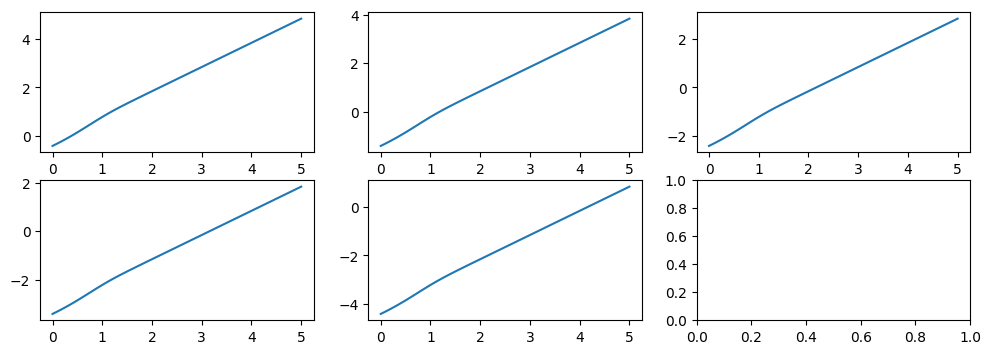

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(12,4))
x = np.linspace(xl, xr, 100)
for i, a_value in enumerate(a):
    axes[i//3][i%3].plot(x, f(x, a_value))
plt.show()

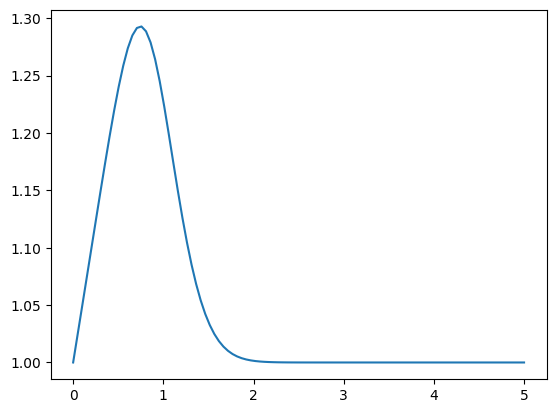

In [77]:
fig, ax = plt.subplots()
x = np.linspace(xl, xr, 100)
ax.plot(x, df(x, 1))
plt.show()

$m = 1$, $M = 1.3$

Для всех $\alpha$ отрезок локализации $[0, 5]$

In [38]:
np.sign(f(xl, a)), np.sign(f(xr, a)), np.sign(df(xl, a)), np.sign(df(xr, a)), np.sign(d2f(xl, a)), np.sign(d2f(xr, a))

(array([-1., -1., -1., -1., -1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([-1., -1., -1., -1., -1.]))

$\varphi(x,\alpha) = x-f(x,\alpha)$

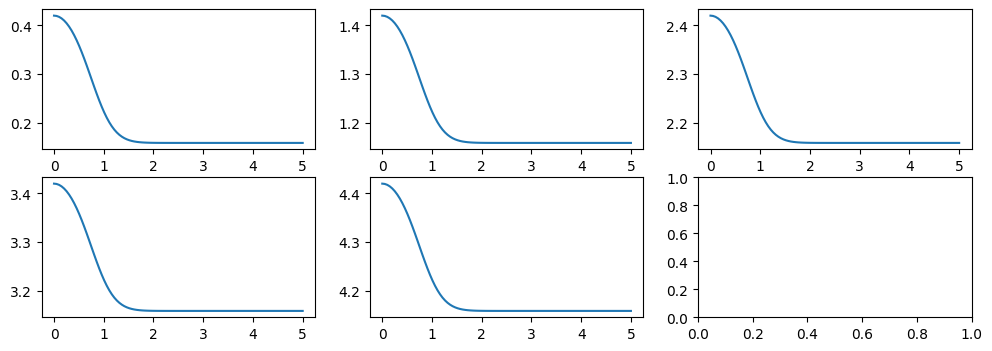

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(12,4))
x = np.linspace(xl, xr, 100)
for i, a_value in enumerate(a):
    axes[i//3][i%3].plot(x, x - f(x,a_value))
plt.show()

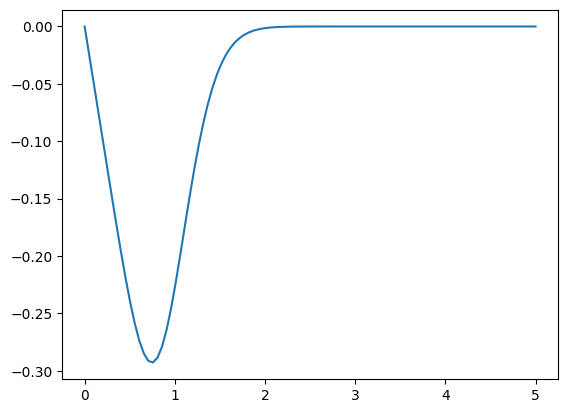

In [79]:
fig, ax = plt.subplots()
x = np.linspace(xl, xr, 100)
ax.plot(x, 1-df(x, 1))
plt.show()

$q = 0.3$

In [80]:
from scipy import optimize

In [81]:
optimize.root(f, 1, args=1)

 message: The solution converged.
 success: True
  status: 1
     fun: [-4.441e-16]
       x: [ 3.840e-01]
    nfev: 7
    fjac: [[-1.000e+00]]
       r: [-1.188e+00]
     qtf: [ 7.709e-10]